In [15]:
path  = "C:/Users/arman/OneDrive/Images/Saved Pictures/fox.jpg"

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

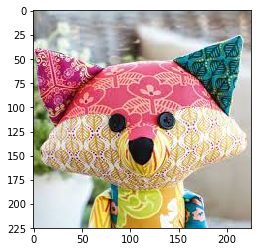

In [17]:
img = mpimg.imread(path)
plt.imshow(img)

In [18]:
def get_colors(img, k):
    #reshape to 3 channels, fit kmeans and take cluster centers colors => k dominant colors
    from sklearn.cluster import KMeans
    img = np.array(img)
    Z = img.reshape((-1,3))
    Z = np.float32(Z)
    clt = KMeans(n_clusters=k) #cluster number
    clt.fit(Z)
    label = clt.labels_
    #clt.cluster_centers_
    center = np.uint8(clt.cluster_centers_)
    res = center[label.flatten()] # spread centroids colors to all cluster pixels
    res2 = res.reshape((img.shape))
    return res2 , center

In [21]:
from sklearn.cluster import KMeans

In [22]:
from zipfile import ZipFile
zip_path = "D:/Huge datasets/avito/data/test_jpg.zip"

In [23]:
def load_batch(zip_path):
    from PIL import Image
    with ZipFile(zip_path) as myzip:
        files_in_zip = myzip.namelist()
        images = []
        clusterized = []
        centers = []
        for i, file in enumerate(files_in_zip[1:]):
            with myzip.open(file) as myfile:
                img = Image.open(myfile)
                images.append(img)
                im_col, center = get_colors(img, 4)
                mean_center = center.mean(axis=0)
                centers.append(mean_center)
                clusterized.append(im_col)
                #plt.imshow(img)
                if i > 25: break
    return images

In [26]:
def plot4(images,
          centers = ['','','',''],
            cr_ratios = [0,0,0,0]):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (7,7))
    ax1.imshow(images[0])
    ax1.set_title(centers[0])
    ax2.imshow(images[1])
    ax2.set_title(centers[1])
    ax3.imshow(images[2])
    ax3.set_title(centers[2])
    ax4.imshow(images[3])
    ax4.set_title(centers[3])

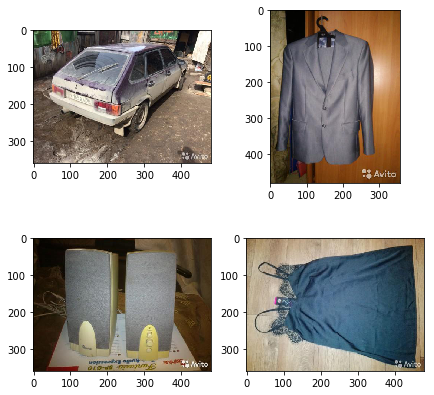

In [27]:
plot4(images[5:])

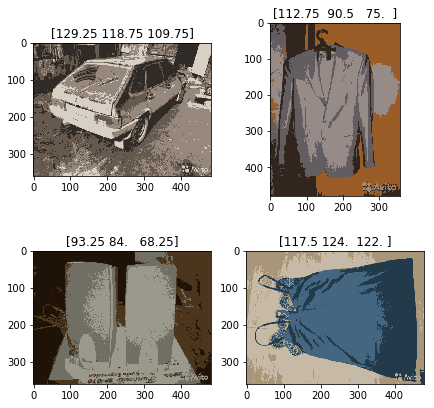

In [28]:
plot4(clusterized[5:], centers[5:])

In [ ]:
##autocropping twitter model, calculate distance between cropped image and normal image
# if distance is small: bien cadrée
# if distance is big: mal cadrée

"https://github.com/wuhuikai/TF-A2RL"

In [1]:
import sys

In [3]:
sys.path.append("C:/Users/arman/OneDrive/Documents/Data Projects/twitter/TF-A2RL")

In [10]:
from A2RL import auto_cropping
import skimage.io as io

In [57]:
def crop_batch(batch):
    batch = [np.array(b)  for b in batch]
    fs = []
    dimensions = auto_cropping(batch)
    for dim, img in zip(dimensions, batch):
        xmin, ymin, xmax, ymax = dim
        cropped = img[ymin:ymax, xmin:xmax]
        fs.append(cropped)
    return fs

def compute_cropratio(img, imgc):
    img = np.array(img)
    orig_dim = np.array(img.shape).sum()
    crop_ratio = (np.array(img.shape) - np.array(imgc.shape)).sum()/orig_dim
    return crop_ratio

def plot_cropped(img, imgc, crop_ratio):
    f, (ax1, ax2) = plt.subplots(2,1, figsize = (7,7))
    ax1.imshow(img)
    ax2.imshow(imgc)
    crop_ratio = compute_cropratio(img, imgc)
    ax1.set_title(crop_ratio)

In [32]:
cropped = crop_batch(images)


In [33]:
ratios = [compute_cropratio(i, c) for i, c in  zip(images, cropped)]

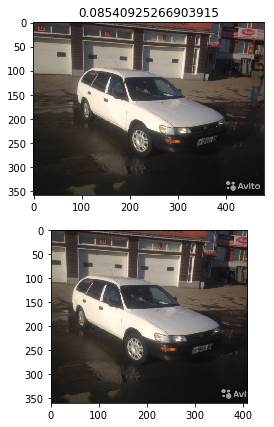

In [58]:
i = 19
plot_cropped(images[i], cropped[i], ratios[i])

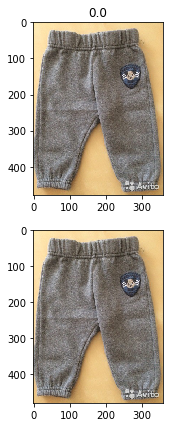

In [60]:
i = 12
plot_cropped(images[i], cropped[i], ratios[i])

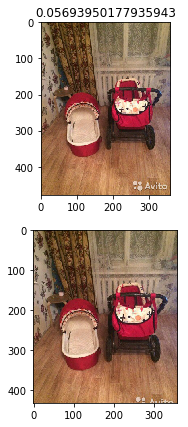

In [61]:
i = 10
plot_cropped(images[i], cropped[i], ratios[i])

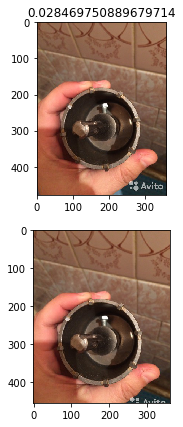

In [63]:
i = 20
plot_cropped(images[i], cropped[i], ratios[i])

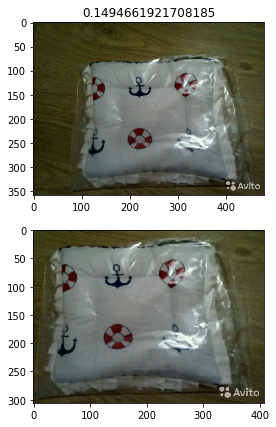

In [66]:
i = 18
plot_cropped(images[i], cropped[i], ratios[i])